In [1]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
ames_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

linear_regression = make_pipeline(SimpleImputer(), StandardScaler(),
                                  LinearRegression())
dt_regression = make_pipeline(SimpleImputer(), DecisionTreeRegressor(random_state=0))

In [5]:
lr_cv_results = cross_validate(linear_regression, data_numerical, target,
                            cv=10, scoring="r2",
                            return_train_score=True,
                            return_estimator=True)

dt_cv_results = cross_validate(dt_regression, data_numerical, target,
                            cv=10, scoring="r2",
                            return_train_score=True,
                            return_estimator=True)

In [6]:
print(f"R2 of linear regresion model on the train set:\n"
      f"{lr_cv_results['train_score'].mean():.3f} +/- {lr_cv_results['train_score'].std():.3f}")

print(f"R2 of linear regresion model on the train set:\n"
      f"{lr_cv_results['test_score'].mean():.3f} +/- {lr_cv_results['test_score'].std():.3f}")

R2 of linear regresion model on the train set:
0.743 +/- 0.017
R2 of linear regresion model on the train set:
0.719 +/- 0.141


In [7]:
print(f"R2 of DT regresion model on the train set:\n"
      f"{dt_cv_results['train_score'].mean():.3f} +/- {dt_cv_results['train_score'].std():.3f}")

print(f"R2 of linear regresion model on the train set:\n"
      f"{dt_cv_results['test_score'].mean():.3f} +/- {dt_cv_results['test_score'].std():.3f}")

R2 of DT regresion model on the train set:
1.000 +/- 0.000
R2 of linear regresion model on the train set:
0.622 +/- 0.074


In [8]:
dt_regression.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=0))],
 'verbose': False,
 'simpleimputer': SimpleImputer(),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=0),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'simpleimputer__verbose': 0,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'mse',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_impurity_split': None,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 0,
 'decisiontre

In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'decisiontreeregressor__max_depth': np.arange(1, 16)}
model_grid_search = GridSearchCV(dt_regression, param_grid=param_grid,
                                 n_jobs=4, cv=10)
model_grid_search.fit(data_numerical, target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=0))]),
             n_jobs=4,
             param_grid={'decisiontreeregressor__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [10]:
search = GridSearchCV(dt_regression, param_grid=param_grid, cv=10)
cv_results_tree_optimal_depth = cross_validate(
    search, data_numerical, target, cv=10, return_estimator=True, n_jobs=2,
)
cv_results_tree_optimal_depth["test_score"].mean()

0.6976647456891891

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max depth'>

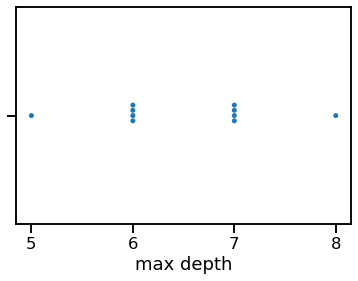

In [11]:
import seaborn as sns
sns.set_context("talk")

max_depth = [
    estimator.best_params_["decisiontreeregressor__max_depth"]
    for estimator in cv_results_tree_optimal_depth["estimator"]
]
max_depth = pd.Series(max_depth, name="max depth")
sns.swarmplot(max_depth)

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder

categorical_processor = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
numerical_processor = SimpleImputer()


preprocessor = make_column_transformer(
    (categorical_processor, selector(dtype_include=object)),
    (numerical_processor, selector(dtype_exclude=object))
)
tree = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=0))

In [13]:
cv_results = cross_validate(
    tree, data, target, cv=10, return_estimator=True, n_jobs=2
)
cv_results["test_score"].mean()

0.7422751120581628